In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta, date
import os
import glob 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sqlite3
from matplotlib.ticker import FuncFormatter

In [2]:
plt.rc('text', usetex = True) # latex ticks
plt.rc('text.latex')
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ['Computer Modern'],
})
plt.rcParams['axes.linewidth'] = 0.4
plt.rcParams['xtick.major.width'] = 0.4
plt.rcParams['xtick.minor.width'] = 0.2
plt.rcParams['ytick.major.width'] = 0.4
plt.rcParams['ytick.minor.width'] = 0.2

Slide_show_width = 4.71512
Paper_width = 6.30045
Format = 1
if Format == 0:
    Image_width = Slide_show_width
if Format == 1:
    Image_width = Paper_width
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica",
# })

EXTRA_SMALL = 4
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 9

plt.rc('font', size=EXTRA_SMALL)         # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=EXTRA_SMALL)    # fontsize of the tick labels
plt.rc('ytick', labelsize=EXTRA_SMALL)    # fontsize of the tick labels
plt.rc('legend', fontsize=EXTRA_SMALL)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [122]:
total_df = pd.concat([pd.read_csv("Data/ID_auction_preprocessed/2018.csv", index_col=0, parse_dates=True, dayfirst=True), pd.read_csv("Data/ID_auction_preprocessed/2019.csv", index_col=0, parse_dates=True, dayfirst=True), pd.read_csv("Data/ID_auction_preprocessed/2020.csv", index_col=0, parse_dates=True, dayfirst=True)])
new_df = []
for idx in total_df.index:
    new_df.append(pd.DataFrame(columns=['price'], index=pd.date_range(idx, idx + timedelta(minutes=95*15), freq="15min"), data=total_df.loc[idx].to_numpy()))
pd.concat(new_df).sort_index().to_csv("Data/ID_auction_preprocessed/ID_auction_price_2018-2020_preproc.csv")

In [123]:
# ge_fr = []
# for year in range(2018, 2021):
#     ge_fr.append(pd.read_csv(f"Data/Crossborder/crossborder_ge_fr_{year}.csv", na_values=['n/e']))

# ge_fr = pd.concat(ge_fr, ignore_index=True)

# new_datetimes = []
# for dat in ge_fr['Time (CET/CEST)']:
#     new_datetimes.append(dat.split(' - ')[0])

# ge_fr_df = pd.DataFrame()
# ge_fr_df['Time from'] = pd.to_datetime(new_datetimes, format="%d.%m.%Y %H:%M", dayfirst=False, yearfirst=False)
# ge_fr_df['DE > FR'] = ge_fr['BZN|DE-LU > BZN|FR [MW]'] - ge_fr['BZN|FR > BZN|DE-LU [MW]']
# ge_fr_df.index = pd.to_datetime(ge_fr_df['Time from'])
# ge_fr_df.drop(columns='Time from', inplace=True)
# ge_fr_df.to_csv("Data/Crossborder/crossborder_ge_fr_2018-2020.csv")

# load = []
# for year in range(2018, 2021):
#     load.append(pd.read_csv(f"Data/Load/Total Load - Day Ahead _ Actual_{year}01010000-{year+1}01010000.csv", na_values=['n/e']))

# load = pd.concat(load, ignore_index=True)

# new_datetimes = []
# for dat in load['Time (CET/CEST)']:
#     new_datetimes.append(dat.split(' - ')[0])

# load_df = pd.DataFrame()
# load_df['Time from'] = pd.to_datetime(new_datetimes, format="%d.%m.%Y %H:%M", dayfirst=False, yearfirst=False)
# load_df['Actual'] = load['Actual Total Load [MW] - BZN|DE-LU']
# load_df['Forecast'] = load['Day-ahead Total Load Forecast [MW] - BZN|DE-LU']
# load_df.index = pd.to_datetime(load_df['Time from'])
# load_df.drop(columns='Time from', inplace=True)
# load_df.to_csv("Data/Load/Load_2018-2020.csv")

# gen = []
# for year in range(2018, 2021):
#     gen.append(pd.read_csv(f"Data/Generation/generation_{year}.csv", na_values=['n/e']))

# gen = pd.concat(gen, ignore_index=True)[["MTU", 'Solar  - Actual Aggregated [MW]', "Wind Offshore  - Actual Aggregated [MW]","Wind Onshore  - Actual Aggregated [MW]"]]

# new_datetimes = []
# for dat in gen['MTU']:
#     new_datetimes.append(dat.split(' - ')[0])

# gen_df = pd.DataFrame()
# gen_df['Time from'] = pd.to_datetime(new_datetimes, format="%d.%m.%Y %H:%M", dayfirst=False, yearfirst=False)
# gen_df['SPV'] = gen['Solar  - Actual Aggregated [MW]']
# gen_df['W'] = gen['Wind Offshore  - Actual Aggregated [MW]'] + gen["Wind Onshore  - Actual Aggregated [MW]"]
# gen_df.index = pd.to_datetime(gen_df['Time from'])
# gen_df.drop(columns='Time from', inplace=True)

# gen_fore = []
# for year in range(2018, 2021):
#     gen_fore.append(pd.read_csv(f"Data/Generation/generation_fore_{year}.csv", na_values=['n/e']))

# gen_fore = pd.concat(gen_fore, ignore_index=True)[["MTU (CET/CEST)", 'Generation - Solar  [MW] Day Ahead/ BZN|DE-LU', "Generation - Wind Offshore  [MW] Day Ahead/ BZN|DE-LU","Generation - Wind Onshore  [MW] Day Ahead/ BZN|DE-LU"]]

# new_datetimes = []
# for dat in gen_fore['MTU (CET/CEST)']:
#     new_datetimes.append(dat.split(' - ')[0])

# gen_fore_df = pd.DataFrame()
# gen_fore_df['Time from'] = pd.to_datetime(new_datetimes, format="%d.%m.%Y %H:%M", dayfirst=False, yearfirst=False)
# gen_fore_df['SPV DA'] = gen_fore['Generation - Solar  [MW] Day Ahead/ BZN|DE-LU']
# gen_fore_df['W DA'] = gen_fore['Generation - Wind Offshore  [MW] Day Ahead/ BZN|DE-LU'] + gen_fore["Generation - Wind Onshore  [MW] Day Ahead/ BZN|DE-LU"]
# gen_fore_df.index = pd.to_datetime(gen_fore_df['Time from'])
# gen_fore_df.drop(columns='Time from', inplace=True)

# gen_df = pd.concat([gen_df, gen_fore_df], axis=1)

# gen_df.to_csv("Data/Generation/Generation_2018-2020.csv")

In [124]:
df_copy = pd.read_csv('Data/preprocessed_dataset.csv', date_format='%s')
df_copy['Datetime offer time'] = pd.to_datetime(df_copy['Datetime offer time'])
df_copy['Datetime from'] = pd.to_datetime(df_copy['Datetime from'])
df_copy_distant = df_copy[df_copy['Datetime from'] - df_copy['Datetime offer time'] > timedelta(hours=3)]

# DA quarterly prices
DA_qtrly = pd.read_csv("Data/Day-Ahead-Quarterly-Data/DA_prices_qtrly_2018_2020_preprocessed.csv", na_values=['n/e'])
DA_qtrly['Datetime from'] = pd.to_datetime(DA_qtrly['Datetime from'], format = "%d.%m.%Y %H:%M")
DA_qtrly = DA_qtrly[DA_qtrly['Datetime from'] > datetime(year=2018,month=11,day=2)]
DA_qtrly['Day-ahead Price [EUR/MWh]']=DA_qtrly['Day-ahead Price [EUR/MWh]'].fillna(DA_qtrly['Day-ahead Price [EUR/MWh]'].rolling(4+1, min_periods=1).mean())
DA_qtrly['Day-ahead Price [EUR/MWh]']=DA_qtrly['Day-ahead Price [EUR/MWh]'].fillna(method='ffill')

# load Load
Load = pd.read_csv("Data/Load/Load_2018-2020.csv", parse_dates = ['Time from'])
Load = Load[Load['Time from'] > datetime(year=2018,month=11,day=2)]
Load[['Actual', 'Forecast']]=Load[['Actual', 'Forecast']].fillna(Load[['Actual', 'Forecast']].rolling(4+1, min_periods=1).mean())

# res generation
gen = pd.read_csv("Data/Generation/Generation_2018-2020.csv", parse_dates = ['Time from'])
gen = gen[gen['Time from'] > datetime(year=2018,month=11,day=2)]
gen[['SPV', 'W']]=gen[['SPV', 'W']].fillna(gen[['SPV', 'W']].rolling(4+1, min_periods=1).mean())

# cross border trade with FR
ge_fr = pd.read_csv("Data/Crossborder/crossborder_ge_fr_2018-2020.csv", parse_dates = ['Time from'])
ge_fr = ge_fr[ge_fr['Time from'] > datetime(year=2018,month=11,day=2)]
ge_fr['DE > FR']=ge_fr['DE > FR'].fillna(ge_fr['DE > FR'].rolling(4+1, min_periods=1).mean())

ID_qtrly = pd.read_csv("Data/ID_auction_preprocessed/ID_auction_price_2018-2020_preproc.csv", index_col=0, parse_dates=True)
ID_qtrly = ID_qtrly[ID_qtrly.index >= datetime(year=2018,month=10,day=31)]

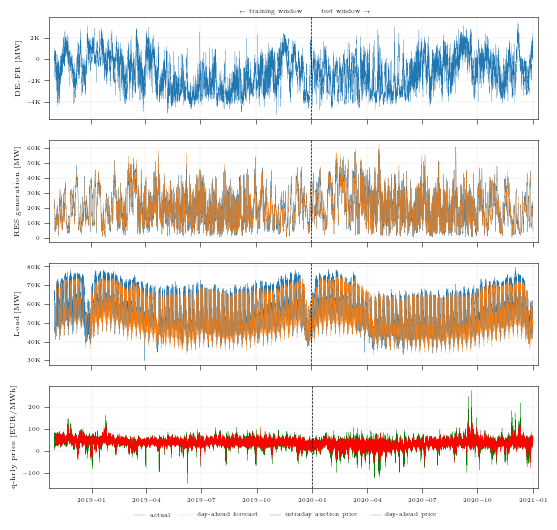

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
f = lambda x, pos: f'{x/10**3:,.0f}K' if x != 0 else 0
# Define the date for the vertical line
split_date = pd.to_datetime("2020-01-01 00:00:00")

# Create subplots
fig, axs = plt.subplots(nrows=4, figsize=(Paper_width, 1.1 * Paper_width))

# Plot the first subplot
ax = axs[0]
ax.plot(ge_fr['Time from'], ge_fr['DE > FR'], lw=0.15)
ax.set_ylabel(r'DE--FR [MW]')
ax.grid(visible=True, linewidth=0.1)
ax.axvline(split_date, color='black', linestyle='--', linewidth=0.5)  # Vertical line at midnight 01-01-2020
ax.text(split_date-timedelta(days=15), ax.get_ylim()[1] * 1.05, r'$\leftarrow$ training window', ha='right', va='bottom')
ax.text(split_date+timedelta(days=15), ax.get_ylim()[1] * 1.05, r'test window $\rightarrow$', ha='left', va='bottom')
ax.yaxis.set_major_formatter(FuncFormatter(f))
ax.margins(x=0.01)

# Plot the second subplot
ax = axs[1]
ax.plot(Load['Time from'], gen['SPV'] + gen['W'], lw=0.2, label='actual')
ax.plot(Load['Time from'], gen['SPV DA'] + gen['W DA'], lw=0.15, label='day-ahead forecast')
ax.grid(visible=True, linewidth=0.1)
ax.set_ylabel('RES generation [MW]')
ax.axvline(split_date, color='black', linestyle='--', linewidth=0.5)  # Vertical line at midnight 01-01-2020
ax.yaxis.set_major_formatter(FuncFormatter(f))
ax.margins(x=0.01)

# Plot the third subplot
ax = axs[2]
ax.plot(Load['Time from'], Load['Actual'], lw=0.2)
ax.plot(Load['Time from'], Load['Forecast'], lw=0.15)
ax.grid(visible=True, linewidth=0.1)
ax.set_ylabel('Load [MW]')
ax.axvline(split_date, color='black', linestyle='--', linewidth=0.5)  # Vertical line at midnight 01-01-2020
ax.yaxis.set_major_formatter(FuncFormatter(f))
ax.margins(x=0.01)

# Plot the fourth subplot
ax = axs[3]
ax.plot(ID_qtrly.index, ID_qtrly.price, lw=0.2, label='intraday auction price', color='green')
ax.plot(DA_qtrly['Datetime from'], DA_qtrly['Day-ahead Price [EUR/MWh]'], lw=0.15, label='day-ahead price', color='red')
ax.set_ylabel('q-hrly price [EUR/MWh]')
ax.grid(visible=True, linewidth=0.1)
ax.axvline(split_date, color='black', linestyle='--', linewidth=0.5)  # Vertical line at midnight 01-01-2020
ax.margins(x=0.01)

# Adjust and save the figure
fig.legend(loc='outside lower center', ncol=4, frameon=False, bbox_to_anchor=(0.5, 0.15))
fig.autofmt_xdate(rotation=0, ha='center')

plt.savefig('Paper_Figures/exogenous_variables.pdf', bbox_inches='tight')


In [126]:
price_count = df_copy.groupby(['Datetime from', 'Datetime offer time']).count()['Price (EUR)']

L = []
for i, group in price_count.groupby(level=0):
    L.append(np.sum(group.values))
z_1 = np.hstack(L)

price_count = df_copy_distant.groupby(['Datetime from', 'Datetime offer time']).count()['Price (EUR)']

L = []
for i, group in price_count.groupby(level=0):
    L.append(np.sum(group.values))
z_2 = np.hstack(L)

In [127]:
z_1

array([206, 193, 185, ..., 754, 855, 946], dtype=int64)

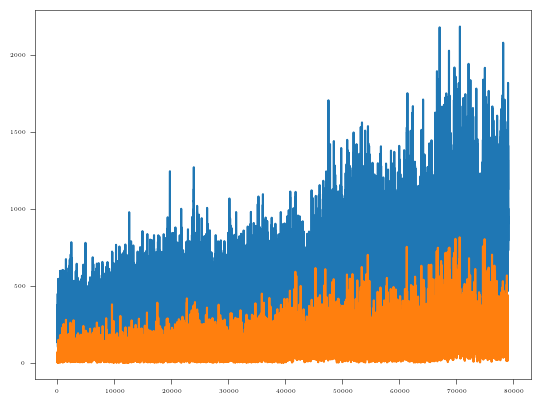

In [128]:
plt.plot(z_1)
plt.plot(z_2)

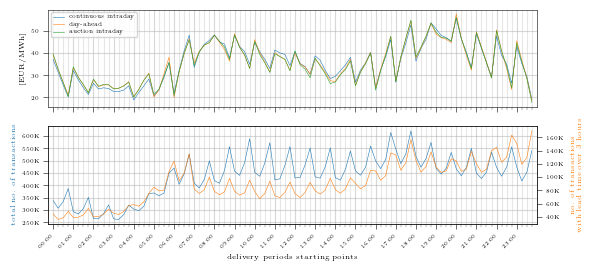

In [ ]:
# df_copy = pd.read_csv('Data/preprocessed_dataset.csv', date_format='%s')
# df_copy['Datetime offer time'] = pd.to_datetime(df_copy['Datetime offer time'])
# df_copy['Datetime from'] = pd.to_datetime(df_copy['Datetime from'])
# df_copy_distant = df_copy[df_copy['Datetime from'] - df_copy['Datetime offer time'] > timedelta(hours=3)]

fig, axs = plt.subplots(nrows=2, figsize=(Image_width, 0.5*Image_width))

ax = axs[0]
# df_copy['Datetime offer time'] = pd.to_datetime(df_copy['Datetime offer time']).dt.time
# df_copy['Datetime from'] = pd.to_datetime(df_copy['Datetime from']).dt.time

# df_copy_distant['Datetime offer time'] = pd.to_datetime(df_copy_distant['Datetime offer time']).dt.time
# df_copy_distant['Datetime from'] = pd.to_datetime(df_copy_distant['Datetime from']).dt.time

price_avged = df_copy.groupby(['Datetime from', 'Datetime offer time']).mean()['Price (EUR)']

L = []
for i, group in price_avged.groupby(level=0):
    L.append(np.mean(group.values))
z = np.hstack(L)

ax.plot(pd.date_range("00:00", "23:45", freq="15min"), z, label = 'continuous intraday', lw=0.4)
ax.set_ylabel("[EUR/MWh]")

DA_qtrly['Datetime from time'] = DA_qtrly['Datetime from'].dt.time
qtrly_da = DA_qtrly.groupby(pd.Grouper(key='Datetime from time'))['Day-ahead Price [EUR/MWh]'].mean().sort_index().values

ax.plot(pd.date_range("00:00", "23:45", freq="15min"), qtrly_da, label='day-ahead', lw=0.4)

ID_qtrly = pd.read_csv("Data/ID_auction_preprocessed/ID_auction_price_2018-2020_preproc.csv", index_col=0, parse_dates=True)
ID_qtrly = ID_qtrly[ID_qtrly.index >= datetime(year=2018,month=10,day=31)]
ID_qtrly['Datetime from time'] = ID_qtrly.index.time
qtrly_da = ID_qtrly.groupby(pd.Grouper(key='Datetime from time'))['price'].mean().sort_index().values

ax.plot(pd.date_range("00:00", "23:45", freq="15min"), qtrly_da, label='auction intraday', lw=0.4)
ax.set_xticks(pd.date_range("00:00", "23:45", freq="15min"), minor=True)
ax.set_xticks(pd.date_range("00:00", "23:00", freq="1h"))

ax.legend()

ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.grid(which='minor', alpha=0.3)
ax.grid(which='major', alpha=0.5)
ax.margins(x=0.01)

ax = axs[1]

price_count = df_copy.groupby(['Datetime from', 'Datetime offer time']).count()['Price (EUR)']

L = []
for i, group in price_count.groupby(level=0):
    L.append(np.sum(group.values))
z_1 = np.hstack(L)
ax.plot(pd.date_range("00:00", "23:45", freq="15min"), z_1, lw=0.4, color='#1f77b4')
ax.set_ylabel('total no. of transactions', color='#1f77b4')
ax.margins(x=0.01)
price_count = df_copy_distant.groupby(['Datetime from', 'Datetime offer time']).count()['Price (EUR)']

ax2 = ax.twinx()
L = []
for i, group in price_count.groupby(level=0):
    L.append(np.sum(group.values))
z_2 = np.hstack(L)
ax2.plot(pd.date_range("00:00", "23:45", freq="15min"), z_2, label='no. of transactions with lead time over 3 hours', lw=0.4, color='#ff7f0e')
ax2.set_ylabel('no. of transactions\nwith lead time over 3 hours', color='#ff7f0e')
ax2.yaxis.set_major_formatter(FuncFormatter(f))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.grid(which='minor', alpha=0.3)
ax.grid(which='major', alpha=0.5)
ax.set_xticks(pd.date_range("00:00", "23:45", freq="15min"), minor=True)
ax.set_xticks(pd.date_range("00:00", "23:00", freq="1h"))
ax.yaxis.set_major_formatter(FuncFormatter(f))
ax.margins(x=0.01)
ax2.margins(x=0.01)
fig.autofmt_xdate(rotation=45)
ax.set_xlabel("delivery time [h]")
plt.savefig('Paper_Figures/daily_shape_continuous_vs_day_ahead.pdf', bbox_inches = 'tight')

# Analysis of proportion of crossborder trades

In [3]:
plain_data = pd.read_csv('Data/Transactions/concatenated_table.csv')
print("Bought from: ", plain_data.groupby('Area Buy')['Volume (MW)'].sum().sort_values()/np.sum(plain_data.groupby('Area Buy')['Volume (MW)'].sum().sort_values()))
print("Sold to: ", plain_data.groupby('Market Area Sell')['Volume (MW)'].sum().sort_values()/np.sum(plain_data.groupby('Market Area Sell')['Volume (MW)'].sum()))

Bought from:  Area Buy
NO4     1.743767e-07
NO3     3.904412e-07
NO1     1.988810e-06
NO5     2.536343e-06
NO2     2.690892e-06
SE2     1.231364e-05
SE4     2.249358e-05
SE1     2.448494e-05
FI      4.429169e-05
SE3     9.116396e-05
DK2     5.686451e-04
DK1     1.000222e-03
BE      7.283260e-03
NL      1.719334e-02
AT      1.780483e-02
FR      2.701628e-02
XBID    7.585446e-02
DE      8.530764e-01
Name: Volume (MW), dtype: float64
Sold to:  Market Area Sell
NO4     1.418400e-07
NO3     8.764592e-07
SE2     6.401609e-06
NO5     9.155542e-06
NO1     1.243616e-05
SE1     2.055968e-05
SE4     2.186420e-05
NO2     4.262164e-05
FI      8.235310e-05
SE3     2.019410e-04
DK2     5.484855e-04
DK1     1.023960e-03
BE      7.387143e-03
NL      1.468460e-02
AT      2.276870e-02
FR      3.245621e-02
XBID    8.139322e-02
DE      8.393393e-01
Name: Volume (MW), dtype: float64


In [15]:
plain_data

Unnamed: 0        Date Area Buy Market Area Sell Hour from Hour to  \
0                  0  30/09/2018       DE               DE     19qh1   19qh1   
1                  1  30/09/2018       DE               DE     21qh3   21qh3   
2                  2  30/09/2018       DE               DE     22qh4   22qh4   
3                  3  30/09/2018       DE               DE     23qh4   23qh4   
4                  4  30/09/2018       DE               DE     19qh3   19qh3   
...              ...         ...      ...              ...       ...     ...   
81464843      163646  31/12/2020       DE               DE     24qh4   24qh4   
81464844      163647  31/12/2020       DE               DE     24qh4   24qh4   
81464845      163648  31/12/2020       DE               DE     24qh4   24qh4   
81464846      163649  31/12/2020       DE               DE     24qh4   24qh4   
81464847      163650  31/12/2020       DE               DE     24qh4   24qh4   

          Volume (MW)  Price (EUR)           Time Stamp    Trade ID  
0                 1.0        56.60  29/09/2018 16:00:00  1046317675  
1                 0.1        71.30  29/09/2018 16:02:00  1046317698  
2                 0.4        57.40  29/09/2018 16:02:00  1046317699  
3                 1.0        57.10  29/09/2018 16:02:00  1046317700  
4                 0.1        64.60  29/09/2018 16:02:00  1046317701  
...               ...          ...                  ...         ...  
81464843         12.6        60.70  31/12/2020 22:39:20  1146305168  
81464844          0.1        83.20  31/12/2020 22:39:50  1146305234  
81464845          0.1        87.00  31/12/2020 22:39:50  1146305235  
81464846          0.3       183.25  31/12/2020 22:39:50  1146305236  
81464847          0.5       183.25  31/12/2020 22:39:50  1146305237  

[81464848 rows x 10 columns]

In [16]:
plain_data['Time Stamp'] = pd.to_datetime(plain_data['Time Stamp'])
plain_data['Date'] = pd.to_datetime(plain_data['Date'])


C:\Users\riczi\AppData\Local\Temp\ipykernel_101920\3871614120.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plain_data['Time Stamp'] = pd.to_datetime(plain_data['Time Stamp'])
C:\Users\riczi\AppData\Local\Temp\ipykernel_101920\3871614120.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  plain_data['Date'] = pd.to_datetime(plain_data['Date'])


In [20]:
plain_data['Time Stamp'].dt.date

0           2018-09-29
1           2018-09-29
2           2018-09-29
3           2018-09-29
4           2018-09-29
               ...    
81464843    2020-12-31
81464844    2020-12-31
81464845    2020-12-31
81464846    2020-12-31
81464847    2020-12-31
Name: Time Stamp, Length: 81464848, dtype: object

In [25]:
plain_data_only_da[(plain_data_only_da['Time Stamp'].dt.hour == 16) & (plain_data_only_da['Time Stamp'].dt.hour == '15')]

Unnamed: 0       Date Area Buy Market Area Sell Hour from Hour to  \
0                  0 2018-09-30       DE               DE     19qh1   19qh1   
1                  1 2018-09-30       DE               DE     21qh3   21qh3   
2                  2 2018-09-30       DE               DE     22qh4   22qh4   
3                  3 2018-09-30       DE               DE     23qh4   23qh4   
4                  4 2018-09-30       DE               DE     19qh3   19qh3   
...              ...        ...      ...              ...       ...     ...   
81301624         427 2020-12-31       DE               DE         9       9   
81301625         428 2020-12-31       DE               DE      8qh3    8qh3   
81301626         429 2020-12-31       DE               DE         1       1   
81301627         430 2020-12-31       DE               DE         1       1   
81301628         431 2020-12-31       DE               DE         1       1   

          Volume (MW)  Price (EUR)          Time Stamp    Trade ID  
0                 1.0        56.60 2018-09-29 16:00:00  1046317675  
1                 0.1        71.30 2018-09-29 16:02:00  1046317698  
2                 0.4        57.40 2018-09-29 16:02:00  1046317699  
3                 1.0        57.10 2018-09-29 16:02:00  1046317700  
4                 0.1        64.60 2018-09-29 16:02:00  1046317701  
...               ...          ...                 ...         ...  
81301624          3.2        40.36 2020-12-30 16:59:09  1146061295  
81301625          0.3        40.25 2020-12-30 16:59:14  1146061313  
81301626          2.0        35.70 2020-12-30 16:59:41  1146061469  
81301627          0.5        35.70 2020-12-30 16:59:41  1146061470  
81301628          0.7        35.70 2020-12-30 16:59:41  1146061471  

[255339 rows x 10 columns]

In [21]:
plain_data_only_da = plain_data[(plain_data['Time Stamp'].dt.date != plain_data['Date'].dt.date)]

In [28]:
plain_data_only_da

Unnamed: 0       Date Area Buy Market Area Sell Hour from Hour to  \
0                  0 2018-09-30       DE               DE     19qh1   19qh1   
1                  1 2018-09-30       DE               DE     21qh3   21qh3   
2                  2 2018-09-30       DE               DE     22qh4   22qh4   
3                  3 2018-09-30       DE               DE     23qh4   23qh4   
4                  4 2018-09-30       DE               DE     19qh3   19qh3   
...              ...        ...      ...              ...       ...     ...   
81318954       17757 2020-12-31       DE               DE      2qh2    2qh2   
81318955       17758 2020-12-31       DE               DE      2qh2    2qh2   
81318956       17759 2020-12-31       DE               DE      2qh4    2qh4   
81318957       17760 2020-12-31     XBID               DE      3qh3    3qh3   
81318958       17761 2020-12-31     XBID               DE      3qh3    3qh3   

          Volume (MW)  Price (EUR)          Time Stamp    Trade ID  
0                 1.0        56.60 2018-09-29 16:00:00  1046317675  
1                 0.1        71.30 2018-09-29 16:02:00  1046317698  
2                 0.4        57.40 2018-09-29 16:02:00  1046317699  
3                 1.0        57.10 2018-09-29 16:02:00  1046317700  
4                 0.1        64.60 2018-09-29 16:02:00  1046317701  
...               ...          ...                 ...         ...  
81318954          4.9        59.98 2020-12-30 23:59:53  1146114117  
81318955         23.9        60.00 2020-12-30 23:59:53  1146114118  
81318956          0.1        50.15 2020-12-30 23:59:56  1146114119  
81318957          0.8        40.60 2020-12-30 23:59:58  1146114121  
81318958          0.1        40.70 2020-12-30 23:59:58  1146114122  

[10158051 rows x 10 columns]

In [34]:
earlier_delivery = plain_data_only_da[(plain_data_only_da['Time Stamp'].dt.hour < 16) & (plain_data_only_da['Date'].dt.year < 2020)]

In [37]:
np.unique(earlier_delivery['Hour from'])
np.unique(earlier_delivery['Hour to'])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '3', '3A', '3B', '4', '5', '6',
       '7', '8', '9'], dtype=object)

In [38]:
np.unique(earlier_delivery['Hour to'])

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '3', '3A', '3B', '4', '5', '6',
       '7', '8', '9'], dtype=object)

In [27]:
min(plain_data['Time Stamp'])

Timestamp('2018-09-29 16:00:00')

In [11]:
datetime_ts = pd.to_datetime(plain_data['Time Stamp']).dt.time

C:\Users\riczi\AppData\Local\Temp\ipykernel_101920\3786190471.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  datetime_ts = pd.to_datetime(plain_data['Time Stamp']).dt.time


In [26]:
df_copy = pd.read_csv('Data/preprocessed_dataset.csv', date_format='%s')
df_copy['Datetime offer time'] = pd.to_datetime(df_copy['Datetime offer time'])
df_copy['Datetime from'] = pd.to_datetime(df_copy['Datetime from'])

## Prices and volume exploratory analysis

In [96]:
df_copy = pd.read_csv('Data/preprocessed_dataset.csv', date_format='%s')
df_copy['Datetime offer time'] = pd.to_datetime(df_copy['Datetime offer time'])
df_copy['Datetime from'] = pd.to_datetime(df_copy['Datetime from'])

In [4]:
df_copy

Unnamed: 0  Volume (MW)  Price (EUR)       Datetime from  \
0                  0          1.0        56.60 2018-09-30 18:00:00   
1                  1          0.1        71.30 2018-09-30 20:30:00   
2                  2          0.4        57.40 2018-09-30 21:45:00   
3                  3          1.0        57.10 2018-09-30 22:45:00   
4                  4          0.1        64.60 2018-09-30 18:30:00   
...              ...          ...          ...                 ...   
42404581    42404581         12.6        60.70 2020-12-31 23:45:00   
42404582    42404582          0.1        83.20 2020-12-31 23:45:00   
42404583    42404583          0.1        87.00 2020-12-31 23:45:00   
42404584    42404584          0.3       183.25 2020-12-31 23:45:00   
42404585    42404585          0.5       183.25 2020-12-31 23:45:00   

         Datetime offer time  Time change  Week day  Time to delivery  
0        2018-09-29 16:00:00            0         5            1560.0  
1        2018-09-29 16:02:00            0         5            1708.0  
2        2018-09-29 16:02:00            0         5            1783.0  
3        2018-09-29 16:02:00            0         5            1843.0  
4        2018-09-29 16:02:00            0         5            1588.0  
...                      ...          ...       ...               ...  
42404581 2020-12-31 23:39:00            0         3               6.0  
42404582 2020-12-31 23:39:00            0         3               6.0  
42404583 2020-12-31 23:39:00            0         3               6.0  
42404584 2020-12-31 23:39:00            0         3               6.0  
42404585 2020-12-31 23:39:00            0         3               6.0  

[42404586 rows x 8 columns]

Statistics for trades <3h before the delivery

In [12]:
less_3h = df_copy[df_copy['Datetime from'] - df_copy['Datetime offer time'] < timedelta(hours=3)][['Price (EUR)','Volume (MW)']].describe()
less_3h.to_csv('Paper_Tables/less_than_3h_stats.csv')
less_3h

Price (EUR)   Volume (MW)
count  3.359668e+07  3.359668e+07
mean   3.618424e+01  1.863402e+00
std    2.804542e+01  2.361050e+00
min   -5.999000e+03  1.000000e-01
25%    2.500000e+01  4.000000e-01
50%    3.600000e+01  1.000000e+00
75%    4.739000e+01  2.600000e+00
max    7.999000e+03  3.010000e+02

Statistics for trades >3h before the delivery

In [13]:
more_3h = df_copy[df_copy['Datetime from'] - df_copy['Datetime offer time'] > timedelta(hours=3)][['Price (EUR)','Volume (MW)']].describe()
more_3h.to_csv('Paper_Tables/more_than_3h_stats.csv')
more_3h

Price (EUR)   Volume (MW)
count  8.744774e+06  8.744774e+06
mean   3.649961e+01  1.578525e+00
std    2.291518e+01  1.845516e+00
min   -5.694000e+02  1.000000e-01
25%    2.573000e+01  4.000000e-01
50%    3.670000e+01  1.000000e+00
75%    4.795000e+01  2.100000e+00
max    1.244690e+03  3.093000e+02

[statistics of price and volume <3h before delivery]/[statistics of price and volume >3h before delivery]

In [14]:
df_copy[df_copy['Datetime from'] - df_copy['Datetime offer time'] < timedelta(hours=3)][['Price (EUR)','Volume (MW)']].describe()/df_copy[df_copy['Datetime from'] - df_copy['Datetime offer time'] > timedelta(hours=3)][['Price (EUR)','Volume (MW)']].describe()

Price (EUR)  Volume (MW)
count     3.841915     3.841915
mean      0.991360     1.180470
std       1.223879     1.279344
min      10.535652     1.000000
25%       0.971628     1.000000
50%       0.980926     1.000000
75%       0.988321     1.238095
max       6.426500     0.973165

In [11]:
import plotly.graph_objects as go

fig = go.Figure()

df_day = df_copy[df_copy['Datetime from'].dt.date == datetime(2020, 11, 3).date()]

for dfrom in np.unique(df_day['Datetime from']):
    d_day_delivery = df_day[df_day['Datetime from'] == dfrom].sort_values(by='Datetime offer time')
    fig.add_trace(go.Scatter(x=d_day_delivery['Datetime offer time'], y=d_day_delivery['Price (EUR)'],
                             mode='lines',
                             name=str(dfrom)))

fig.update_layout(title='Delivery Prices over Time',
                  xaxis_title='Datetime offer time',
                  yaxis_title='Price (EUR)',
                  legend_title='Datetime from')

fig.show()


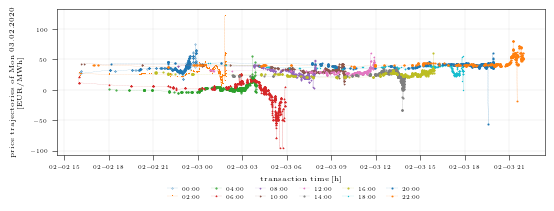

In [136]:
import plotly.graph_objects as go

fig, ax = plt.subplots(figsize=(Image_width, 0.3*Image_width))

df_day = df_copy[df_copy['Datetime from'].dt.date == datetime(2020, 2, 3).date()]

markers = ['.',',','o','v','^','<','>','h','H','+','D','d','|','_']
idx = 0
for dfrom in np.unique(df_day['Datetime from']):
    if pd.to_datetime(dfrom).minute == 0 and pd.to_datetime(dfrom).hour%2 == 0:
        d_day_delivery = df_day[df_day['Datetime from'] == dfrom].sort_values(by='Datetime offer time')
        markersize = 0.3
        if markers[idx] == '+':
            markersize = 0.7
        ax.plot(d_day_delivery['Datetime offer time'], d_day_delivery['Price (EUR)'], label = pd.to_datetime(dfrom).strftime("%H:%M"), marker=markers[idx], markersize=0.5, lw=0.1, ls='--')
        idx += 1
fig.legend(loc='outside lower center', ncol=6, frameon=False, bbox_to_anchor=(0.5, -0.15))
ax.set_xlabel('transaction time [h]')
ax.set_ylabel('price trajectories of Mon 03.02.2020\n[EUR/MWh]')
ax.grid(visible=True, linewidth=0.1)
plt.savefig(f'Paper_Figures/example_of_trajectories.pdf', bbox_inches = 'tight')

# 3D price and volume analysis

C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:38: RuntimeWarning: Mean of empty slice
  print(np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:40: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


-20.5836012942613 95.00917857142856


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:38: RuntimeWarning: Mean of empty slice
  print(np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:40: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


16.97177070266604 68.70666461038962


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:38: RuntimeWarning: Mean of empty slice
  print(np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:40: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


1.8357566137566126 63.072529075091566


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:38: RuntimeWarning: Mean of empty slice
  print(np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:40: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


-21.771473183784533 51.947702020202016


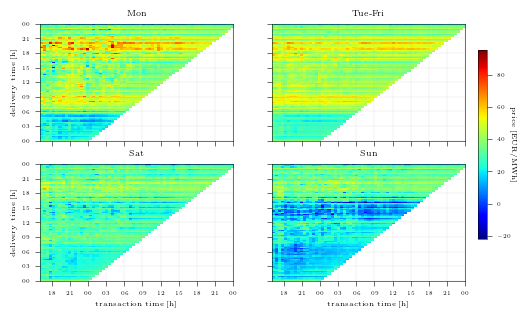

In [112]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(Paper_width,0.6*Paper_width), sharex=True, sharey=True)

titles = ['Mon', 'Tue-Fri', 'Sat', 'Sun']

collect_matrices = [] # comment if You run 2nd time and set False in line 7

for idx, wday, ax in zip(range(4), [[0],[1,2,3,4],[5],[6]], axs.flat):
    if True: # change to false if You run cell 2nd time
        df_copy_0 = df_copy[['Datetime from', 'Datetime offer time', 'Price (EUR)']].copy(deep=True)
        df_copy_0 = df_copy_0[(df_copy_0['Datetime from'].dt.date != df_copy_0['Datetime offer time'].dt.date) & (df_copy_0['Datetime from'].dt.weekday.isin(wday))]
        df_copy_0['Datetime offer time'] = pd.to_datetime(df_copy_0['Datetime offer time']).dt.time
        df_copy_0['Datetime from'] = pd.to_datetime(df_copy_0['Datetime from']).dt.time

        price_avged = df_copy_0.groupby(['Datetime from', 'Datetime offer time']).mean()['Price (EUR)']

        total_matrix_0 = np.zeros((96, 24*60))*np.nan
        for i, group in enumerate(price_avged.groupby(level=0)):
            for j, g in enumerate(group[1].groupby(level=1)):
                total_matrix_0[i, (datetime.combine(date.today(), g[0]) - datetime.today().replace(hour=0,minute=0,second=0,microsecond=0)).seconds//60] = g[1].to_numpy()[0]
        df_copy_1 = df_copy[['Datetime from', 'Datetime offer time', 'Price (EUR)']].copy(deep=True)
        df_copy_1 = df_copy_1[(df_copy_1['Datetime from'].dt.date == df_copy_1['Datetime offer time'].dt.date) & (df_copy_1['Datetime from'].dt.weekday.isin(wday))]
        df_copy_1['Datetime offer time'] = pd.to_datetime(df_copy_1['Datetime offer time']).dt.time
        df_copy_1['Datetime from'] = pd.to_datetime(df_copy_1['Datetime from']).dt.time

        price_avged = df_copy_1.groupby(['Datetime from', 'Datetime offer time']).mean()['Price (EUR)']

        total_matrix_1 = np.zeros((96, 24*60))*np.nan
        for i, group in enumerate(price_avged.groupby(level=0)):
            for j, g in enumerate(group[1].groupby(level=1)):
                total_matrix_1[i+1, (datetime.combine(date.today(), g[0]) - datetime.today().replace(hour=0,minute=0,second=0,microsecond=0)).seconds//60] = g[1].to_numpy()[0]

        total_matrix = np.hstack((total_matrix_0, total_matrix_1))

        collect_matrices.append(total_matrix)
    else:
        total_matrix = collect_matrices[idx]

    print(np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))

    im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',
                cmap='jet',
                extent=[datetime.today().replace(hour=16,minute=0,second=0,microsecond=0), date.today() + timedelta(days=2), date.today() + timedelta(days=1), date.today() + timedelta(days=2) - timedelta(minutes=15)],
                interpolation='none',
                vmin=-22, vmax=95)

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
    ax.yaxis_date()
    ax.yaxis.set_major_formatter(mdates.DateFormatter("%H"))

    # cbar = fig.colorbar(im)
    # cbar.set_label('price [EUR/MWh]', rotation=270, labelpad=12)
    if idx > 1:
        ax.set_xlabel('transaction time [h]')
    if idx in [0,2]:
        ax.set_ylabel('delivery time [h]')
    ax.grid(visible=True, linewidth=0.1)
    ax.set_title(titles[idx])
fig.autofmt_xdate(rotation=0, ha='center')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.31, 0.015, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('price [EUR/MWh]', rotation=270, labelpad=5)

plt.savefig('Paper_Figures/mon_aggtuefri_sat_sun_3D_prices.pdf', bbox_inches = 'tight')

21146.0 8.0
21328.75 14.5
19748.0 8.0
19175.0 9.0


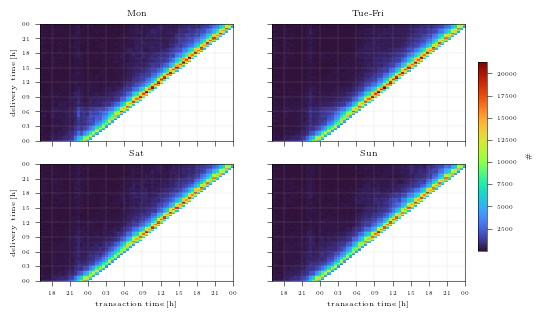

In [113]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(Paper_width,0.6*Paper_width), sharex=True, sharey=True)

titles = ['Mon', 'Tue-Fri', 'Sat', 'Sun']

for idx, wday, ax in zip(range(4), [[0],[1,2,3,4],[5],[6]], axs.flat):
    df_copy_0 = df_copy[['Datetime from', 'Datetime offer time', 'Price (EUR)']].copy(deep=True)
    df_copy_0 = df_copy_0[(df_copy_0['Datetime from'].dt.date != df_copy_0['Datetime offer time'].dt.date) & (df_copy_0['Datetime from'].dt.weekday.isin(wday))]
    df_copy_0['Datetime offer time'] = pd.to_datetime(df_copy_0['Datetime offer time']).dt.time
    df_copy_0['Datetime from'] = pd.to_datetime(df_copy_0['Datetime from']).dt.time

    price_avged = df_copy_0.groupby(['Datetime from', 'Datetime offer time']).count()['Price (EUR)']

    total_matrix_0 = np.zeros((96, 24*60))*np.nan
    for i, group in enumerate(price_avged.groupby(level=0)):
        for j, g in enumerate(group[1].groupby(level=1)):
            total_matrix_0[i, (datetime.combine(date.today(), g[0]) - datetime.today().replace(hour=0,minute=0,second=0,microsecond=0)).seconds//60] = g[1].to_numpy()[0]
    df_copy_1 = df_copy[['Datetime from', 'Datetime offer time', 'Price (EUR)']].copy(deep=True)
    df_copy_1 = df_copy_1[(df_copy_1['Datetime from'].dt.date == df_copy_1['Datetime offer time'].dt.date) & (df_copy_1['Datetime from'].dt.weekday.isin(wday))]
    df_copy_1['Datetime offer time'] = pd.to_datetime(df_copy_1['Datetime offer time']).dt.time
    df_copy_1['Datetime from'] = pd.to_datetime(df_copy_1['Datetime from']).dt.time

    price_avged = df_copy_1.groupby(['Datetime from', 'Datetime offer time']).count()['Price (EUR)']

    total_matrix_1 = np.zeros((96, 24*60))*np.nan
    for i, group in enumerate(price_avged.groupby(level=0)):
        for j, g in enumerate(group[1].groupby(level=1)):
            total_matrix_1[i+1, (datetime.combine(date.today(), g[0]) - datetime.today().replace(hour=0,minute=0,second=0,microsecond=0)).seconds//60] = g[1].to_numpy()[0]

    total_matrix = np.hstack((total_matrix_0, total_matrix_1))

    if idx == 1:
        total_matrix = total_matrix/4

    sum_matrix = np.nansum(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]
    sum_matrix[sum_matrix == 0] = np.nan

    print(np.nanmax(sum_matrix), np.nanmin(sum_matrix))

    im = ax.imshow(sum_matrix, origin='lower', aspect='auto',
                cmap='turbo',
                extent=[datetime.today().replace(hour=16,minute=0,second=0,microsecond=0), date.today() + timedelta(days=2), date.today() + timedelta(days=1), date.today() + timedelta(days=2) - timedelta(minutes=15)],
                interpolation='none',
                vmin=8.0, vmax=21328.75)

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
    ax.yaxis_date()
    ax.yaxis.set_major_formatter(mdates.DateFormatter("%H"))

    if idx > 1:
        ax.set_xlabel('transaction time [h]')
    if idx in [0,2]:
        ax.set_ylabel('delivery time [h]')
    ax.grid(visible=True, linewidth=0.1)
    ax.set_title(titles[idx])

fig.autofmt_xdate(rotation=0, ha='center')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.28, 0.015, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('\#', rotation=270, labelpad=11)

plt.savefig('Paper_Figures/mon_aggtuefri_sat_sun_3D_avg_daily_trades_no.pdf', bbox_inches = 'tight')

C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:60: RuntimeWarning: Mean of empty slice
  print(np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:61: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


57.68355067309902 0.019445436482630897


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:60: RuntimeWarning: Mean of empty slice
  print(np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:61: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


77.45597441758358 0.49417173505020545


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:60: RuntimeWarning: Mean of empty slice
  print(np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:61: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


35.80679919129356 0.0


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:60: RuntimeWarning: Mean of empty slice
  print(np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:61: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


46.32558200932583 0.2441998088025988


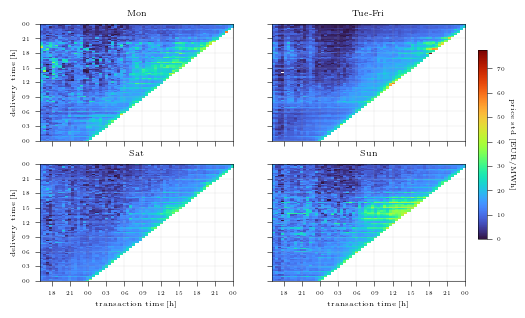

In [114]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(Paper_width,0.6*Paper_width), sharex=True, sharey=True)

titles = ['Mon', 'Tue-Fri', 'Sat', 'Sun']

for idx, wday, ax in zip(range(4), [[0],[1,2,3,4],[5],[6]], axs.flat):
    if idx != 1:
        df_copy_0 = df_copy[['Datetime from', 'Datetime offer time', 'Price (EUR)']].copy(deep=True)
        df_copy_0 = df_copy_0[(df_copy_0['Datetime from'].dt.date != df_copy_0['Datetime offer time'].dt.date) & (df_copy_0['Datetime from'].dt.weekday.isin(wday))]
        df_copy_0['Datetime offer time'] = pd.to_datetime(df_copy_0['Datetime offer time']).dt.time
        df_copy_0['Datetime from'] = pd.to_datetime(df_copy_0['Datetime from']).dt.time

        price_avged = df_copy_0.groupby(['Datetime from', 'Datetime offer time']).std()['Price (EUR)']

        total_matrix_0 = np.zeros((96, 24*60))*np.nan
        for i, group in enumerate(price_avged.groupby(level=0)):
            for j, g in enumerate(group[1].groupby(level=1)):
                total_matrix_0[i, (datetime.combine(date.today(), g[0]) - datetime.today().replace(hour=0,minute=0,second=0,microsecond=0)).seconds//60] = g[1].to_numpy()[0]
        df_copy_1 = df_copy[['Datetime from', 'Datetime offer time', 'Price (EUR)']].copy(deep=True)
        df_copy_1 = df_copy_1[(df_copy_1['Datetime from'].dt.date == df_copy_1['Datetime offer time'].dt.date) & (df_copy_1['Datetime from'].dt.weekday.isin(wday))]
        df_copy_1['Datetime offer time'] = pd.to_datetime(df_copy_1['Datetime offer time']).dt.time
        df_copy_1['Datetime from'] = pd.to_datetime(df_copy_1['Datetime from']).dt.time

        price_avged = df_copy_1.groupby(['Datetime from', 'Datetime offer time']).std()['Price (EUR)']

        total_matrix_1 = np.zeros((96, 24*60))*np.nan
        for i, group in enumerate(price_avged.groupby(level=0)):
            for j, g in enumerate(group[1].groupby(level=1)):
                total_matrix_1[i+1, (datetime.combine(date.today(), g[0]) - datetime.today().replace(hour=0,minute=0,second=0,microsecond=0)).seconds//60] = g[1].to_numpy()[0]
        total_matrix = np.hstack((total_matrix_0, total_matrix_1))

    else:
        total_matrix_4_days = np.zeros((96, 48*60))
        for day in wday:
            df_copy_0 = df_copy[['Datetime from', 'Datetime offer time', 'Price (EUR)']].copy(deep=True)
            df_copy_0 = df_copy_0[(df_copy_0['Datetime from'].dt.date != df_copy_0['Datetime offer time'].dt.date) & (df_copy_0['Datetime from'].dt.weekday.isin([day]))]
            df_copy_0['Datetime offer time'] = pd.to_datetime(df_copy_0['Datetime offer time']).dt.time
            df_copy_0['Datetime from'] = pd.to_datetime(df_copy_0['Datetime from']).dt.time

            price_avged = df_copy_0.groupby(['Datetime from', 'Datetime offer time']).std()['Price (EUR)']

            total_matrix_0 = np.zeros((96, 24*60))
            for i, group in enumerate(price_avged.groupby(level=0)):
                for j, g in enumerate(group[1].groupby(level=1)):
                    total_matrix_0[i, (datetime.combine(date.today(), g[0]) - datetime.today().replace(hour=0,minute=0,second=0,microsecond=0)).seconds//60] = g[1].to_numpy()[0]
            df_copy_1 = df_copy[['Datetime from', 'Datetime offer time', 'Price (EUR)']].copy(deep=True)
            df_copy_1 = df_copy_1[(df_copy_1['Datetime from'].dt.date == df_copy_1['Datetime offer time'].dt.date) & (df_copy_1['Datetime from'].dt.weekday.isin([day]))]
            df_copy_1['Datetime offer time'] = pd.to_datetime(df_copy_1['Datetime offer time']).dt.time
            df_copy_1['Datetime from'] = pd.to_datetime(df_copy_1['Datetime from']).dt.time

            price_avged = df_copy_1.groupby(['Datetime from', 'Datetime offer time']).std()['Price (EUR)']

            total_matrix_1 = np.zeros((96, 24*60))
            for i, group in enumerate(price_avged.groupby(level=0)):
                for j, g in enumerate(group[1].groupby(level=1)):
                    total_matrix_1[i+1, (datetime.combine(date.today(), g[0]) - datetime.today().replace(hour=0,minute=0,second=0,microsecond=0)).seconds//60] = g[1].to_numpy()[0]
            total_matrix = np.hstack((total_matrix_0, total_matrix_1))
            total_matrix_4_days = np.sum(np.dstack((total_matrix_4_days,total_matrix)),2)
        total_matrix = total_matrix_4_days/4
        total_matrix[total_matrix == 0] = np.nan
    print(np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
    im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',
                cmap='turbo',
                extent=[datetime.today().replace(hour=16,minute=0,second=0,microsecond=0), date.today() + timedelta(days=2), date.today() + timedelta(days=1), date.today() + timedelta(days=2) - timedelta(minutes=15)],
                interpolation='none',
                vmin=0, vmax=77.45597441758358)

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
    ax.yaxis_date()
    ax.yaxis.set_major_formatter(mdates.DateFormatter("%H"))

    if idx > 1:
        ax.set_xlabel('transaction time [h]')
    if idx in [0,2]:
        ax.set_ylabel('delivery time [h]')
    ax.grid(visible=True, linewidth=0.1)
    ax.set_title(titles[idx])

fig.autofmt_xdate(rotation=0, ha='center')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.31, 0.015, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('price std [EUR/MWh]', rotation=270, labelpad=8)
plt.savefig('Paper_Figures/mon_aggtuefri_sat_sun_3D_avg_daily_std.pdf', bbox_inches = 'tight')

In [8]:
df = pd.read_csv('Data/preprocessed_dataset.csv')

con = sqlite3.connect('Forecasting/data_ID.db')
sql_str = f"SELECT * FROM with_dummies;" # load only the data required for simu, so up to trade time
daily_data = pd.read_sql(sql_str, con)
daily_data['Time'] = pd.to_datetime(daily_data['Time'])

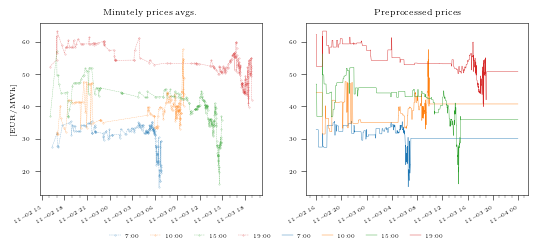

In [9]:
fig, axs = plt.subplots(ncols=2, figsize=(Image_width, 0.4*Image_width))

ax = axs[0]
ttd_minutely = pd.date_range(datetime(year=2020,month=11,day=2,hour=16), datetime(year=2020,month=11,day=4,hour=0), freq='1min')
idxs = [int(7*4), int(10*4), int(15*4)]
labels = ['7:00','10:00','15:00', '19:00']
for d_i, dat in enumerate(['2020-11-03 07:00:00','2020-11-03 10:00:00','2020-11-03 15:00:00', '2020-11-03 19:00:00']):
    current_data_avg = df[df['Datetime from'] == dat].groupby('Time to delivery', as_index=False)
    price = []
    ttd = []
    for group in current_data_avg:
        price.append(np.sum(group[1]['Price (EUR)'].to_numpy()*group[1]['Volume (MW)'].to_numpy())/np.sum(group[1]['Volume (MW)']))
        ttd.append(pd.to_datetime(dat)  - timedelta(minutes = group[1]['Time to delivery'].to_numpy()[0]))
    ax.plot(ttd, price,marker='.',ls='--', markersize=0.5,alpha=0.5,label=labels[d_i], lw=0.3)
    # ax.plot(ttd_minutely, preproc_15[-(31+28),idxs[d_i], :])
ax.set_ylabel('[EUR/MWh]')
hours = mdates.HourLocator(interval = 1)
ax.xaxis.set_minor_locator(hours)
ax.set_title("Minutely prices avgs.")
# plt.legend(['delivery 7:00','delivery 10:00','delivery 15:00', 'delivery 19:00'], ncols=2)
plt.grid(which='both', axis='x')

ax = axs[1]
ax.plot(daily_data[daily_data['Day'] == 733]['Time'], daily_data[daily_data['Day'] == 733]['28'],label=labels[0], lw=0.3)
ax.plot(daily_data[daily_data['Day'] == 733]['Time'], daily_data[daily_data['Day'] == 733]['40'],label=labels[1], lw=0.3)
ax.plot(daily_data[daily_data['Day'] == 733]['Time'], daily_data[daily_data['Day'] == 733]['60'],label=labels[2], lw=0.3)
ax.plot(daily_data[daily_data['Day'] == 733]['Time'], daily_data[daily_data['Day'] == 733]['76'],label=labels[3], lw=0.3)
ax.set_title("Preprocessed prices")
ax.xaxis.set_minor_locator(hours)
plt.grid(which='both', axis='x')
plt.gcf().autofmt_xdate()
fig.legend(loc='outside lower center', ncol=8,frameon=False,borderaxespad=0, bbox_to_anchor=(0.5, 0.02))
fig.autofmt_xdate()
plt.savefig(f'Paper_Figures/example_of_preprocessing.pdf', bbox_inches = 'tight')

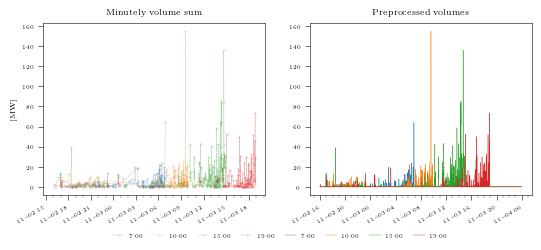

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(Image_width, 0.4*Image_width))

ax = axs[0]
ttd_minutely = pd.date_range(datetime(year=2020,month=11,day=2,hour=16), datetime(year=2020,month=11,day=4,hour=0), freq='1min')
idxs = [int(7*4), int(10*4), int(15*4)]
labels = ['7:00','10:00','15:00', '19:00']
for d_i, dat in enumerate(['2020-11-03 07:00:00','2020-11-03 10:00:00','2020-11-03 15:00:00', '2020-11-03 19:00:00']):
    current_data_avg = df[df['Datetime from'] == dat].groupby('Time to delivery', as_index=False)
    price = []
    ttd = []
    for group in current_data_avg:
        price.append(np.sum(group[1]['Volume (MW)']))
        ttd.append(pd.to_datetime(dat) - timedelta(minutes = group[1]['Time to delivery'].to_numpy()[0]))
    ax.plot(ttd, price,marker='.',ls='--', markersize=0.5,alpha=0.5,label=labels[d_i], lw=0.3)
    # ax.plot(ttd_minutely, preproc_15[-(31+28),idxs[d_i], :])
# ax.set_xlabel('time [min]')
ax.set_ylabel('[MW]')
hours = mdates.HourLocator(interval = 1)
ax.xaxis.set_minor_locator(hours)
ax.set_title("Minutely volume sum")
# plt.legend(['delivery 7:00','delivery 10:00','delivery 15:00', 'delivery 19:00'], ncols=2)
plt.grid(which='both', axis='x')

ax = axs[1]
ax.plot(daily_data[daily_data['Day'] == 733]['Time'], daily_data[daily_data['Day'] == 733]['124'],label=labels[0], lw=0.3)
ax.plot(daily_data[daily_data['Day'] == 733]['Time'], daily_data[daily_data['Day'] == 733]['136'],label=labels[1], lw=0.3)
ax.plot(daily_data[daily_data['Day'] == 733]['Time'], daily_data[daily_data['Day'] == 733]['156'],label=labels[2], lw=0.3)
ax.plot(daily_data[daily_data['Day'] == 733]['Time'], daily_data[daily_data['Day'] == 733]['172'],label=labels[3], lw=0.3)
ax.set_title("Preprocessed volumes")
ax.xaxis.set_minor_locator(hours)
plt.grid(which='both', axis='x')
plt.gcf().autofmt_xdate()
fig.legend(loc='outside lower center', ncol=8,frameon=False,borderaxespad=0, bbox_to_anchor=(0.5, 0.02))
# fig.autofmt_xdate()
plt.savefig(f'Paper_Figures/volume_example_of_preprocessing.pdf', bbox_inches = 'tight')

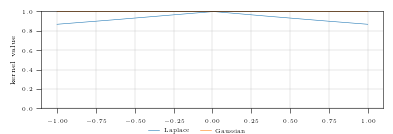

In [10]:
import scipy
q_kernel = 0.563
q_kernel_naive = 0.51 # WARNING only for q >= 1/2
q_data = 0.95
q_data_naive = 0.95

fig, ax = plt.subplots(figsize=(0.7*Paper_width, 0.2*Paper_width))
laplace = lambda x: np.exp(np.log(2 - 2*q_kernel)/np.quantile(np.abs(x), q_data)*(np.abs(x)))
gaussian = lambda x: np.exp(-1/(2*(np.quantile(np.abs(x), q_data_naive) / scipy.stats.norm.ppf(q_kernel_naive, loc=0, scale=1))**2)*(np.abs(x))**2)
# laplace_prim = lambda x: np.exp(-1*(np.abs(x)))
# gaussian_prim = lambda x: np.exp(-0.1*(np.abs(x))**2)

reach = 1
ax.plot(np.linspace(-reach, reach, 1000), laplace(np.linspace(-reach, reach, 1000)), label='Laplace', lw=0.4)
ax.plot(np.linspace(-reach, reach, 1000), gaussian(np.linspace(-reach, reach, 1000)), label='Gaussian', lw=0.4)
# plt.plot(np.linspace(-reach, reach, 1000), laplace_prim(np.linspace(-reach, reach, 1000)))
# plt.plot(np.linspace(-reach, reach, 1000), gaussian_prim(np.linspace(-reach, reach, 1000)))
fig.legend(loc='outside lower center', ncol=2, frameon=False, borderaxespad=-0.3)
ax.grid(visible=True, linewidth=0.2)
ax.set_ylim([0, 1])
ax.set_ylabel("kernel value")
plt.savefig(f'Paper_Figures/kernels_example.pdf', bbox_inches = 'tight')

In [11]:
gaussian(np.linspace(-reach, reach, 1000))

array([0.99965193, 0.99965332, 0.99965471, 0.99965609, 0.99965748,
       0.99965886, 0.99966024, 0.99966161, 0.99966298, 0.99966435,
       0.99966572, 0.99966708, 0.99966845, 0.9996698 , 0.99967116,
       0.99967251, 0.99967386, 0.99967521, 0.99967656, 0.9996779 ,
       0.99967924, 0.99968057, 0.99968191, 0.99968324, 0.99968457,
       0.99968589, 0.99968721, 0.99968853, 0.99968985, 0.99969116,
       0.99969247, 0.99969378, 0.99969509, 0.99969639, 0.99969769,
       0.99969899, 0.99970028, 0.99970157, 0.99970286, 0.99970415,
       0.99970543, 0.99970671, 0.99970799, 0.99970927, 0.99971054,
       0.99971181, 0.99971307, 0.99971434, 0.9997156 , 0.99971686,
       0.99971811, 0.99971937, 0.99972062, 0.99972186, 0.99972311,
       0.99972435, 0.99972559, 0.99972682, 0.99972806, 0.99972929,
       0.99973051, 0.99973174, 0.99973296, 0.99973418, 0.9997354 ,
       0.99973661, 0.99973782, 0.99973903, 0.99974023, 0.99974144,
       0.99974264, 0.99974383, 0.99974503, 0.99974622, 0.99974

In [ ]:
x = np.linspace(-reach, reach, 1000)
laplace = lambda x, q_kernel, q_data: np.log(2 - 2*q_kernel)/np.quantile(np.abs(x), q_data)
gaussian = lambda x, q_kernel_naive, q_data_naive: -1/(2*(np.quantile(np.abs(x), q_data_naive) / scipy.stats.norm.ppf(q_kernel_naive, loc=0, scale=1))**2)

In [ ]:
import numpy as np
import plotly.graph_objects as go
import scipy.stats

# Parameters
reach = 5  # Define the reach of x
x = np.linspace(-reach, reach, 1000)
q_kernel_values = np.linspace(0.6, 0.95, 5)  # Sample q_kernel values
q_data_values = np.linspace(0.1, 0.9, 5)
q_kernel_naive_values = np.linspace(0.6, 0.95, 5)
q_data_naive_values = np.linspace(0.1, 0.9, 5)

# Functions
laplace = lambda x, q_kernel, q_data: np.log(2 - 2*q_kernel)/np.quantile(np.abs(x), q_data)
gaussian = lambda x, q_kernel_naive, q_data_naive: -1/(2*(np.quantile(np.abs(x), q_data_naive) / scipy.stats.norm.ppf(q_kernel_naive, loc=0, scale=1))**2)

# Create grids for q_kernel and q_data
Q_kernel, Q_data = np.meshgrid(q_kernel_values, q_data_values)

# Laplace Surface
Z_laplace = np.array([
    laplace(x, q_kernel, q_data).mean() for q_kernel, q_data in zip(Q_kernel.ravel(), Q_data.ravel())
]).reshape(Q_kernel.shape)

# Gaussian Surface
Z_gaussian = np.array([
    gaussian(x, q_kernel_naive, q_data_naive).mean()
    for q_kernel_naive, q_data_naive in zip(Q_kernel.ravel(), Q_data.ravel())
]).reshape(Q_kernel.shape)

# Plot using Plotly
fig = go.Figure()

# Add Laplace Surface
fig.add_trace(
    go.Surface(
        z=Z_laplace,
        x=q_kernel_values,
        y=q_data_values,
        colorscale="Viridis",
        name="Laplace",
    )
)

# Add Gaussian Surface
fig.add_trace(
    go.Surface(
        z=Z_gaussian,
        x=q_kernel_values,
        y=q_data_values,
        colorscale="Cividis",
        name="Gaussian",
    )
)

# Layout
fig.update_layout(
    title="3D Surfaces for Laplace and Gaussian Functions",
    scene=dict(
        xaxis_title="q_kernel",
        yaxis_title="q_data",
        zaxis_title="Function Value",
    ),
)

# Show Plot
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go
import scipy.stats

# Parameters
reach = 1  # Define the reach of x
x = np.linspace(-reach, reach, 1000)
q_kernel_values = np.linspace(0.5, 0.95, 100)  # Sample q_kernel values
q_data_values = np.linspace(0.1, 0.9, 100)

# Functions
laplace = lambda x, q_kernel, q_data: np.log(2 - 2*q_kernel)/np.quantile(np.abs(x), q_data)
gaussian = lambda x, q_kernel_naive, q_data_naive: -1/(2*(np.quantile(np.abs(x), q_data_naive) / scipy.stats.norm.ppf(q_kernel_naive, loc=0, scale=1))**2)

laplace_indep = lambda x, q_kernel, q_data: np.log(2 - 2*q_kernel)/np.quantile(np.abs(x), 0.5)
gaussian_indep = lambda x, q_kernel_naive, q_data_naive: -1/(2*(np.quantile(np.abs(x), 0.5) / scipy.stats.norm.ppf(q_kernel_naive, loc=0, scale=1))**2)

# Create grids for q_kernel and q_data
Q_kernel, Q_data = np.meshgrid(q_kernel_values, q_data_values)

# Laplace Surface
Z_laplace = np.array([
    laplace(x, q_kernel, q_data).mean() for q_kernel, q_data in zip(Q_kernel.ravel(), Q_data.ravel())
]).reshape(Q_kernel.shape)

# Gaussian Surface
Z_gaussian = np.array([
    gaussian(x, q_kernel, q_data).mean()
    for q_kernel, q_data in zip(Q_kernel.ravel(), Q_data.ravel())
]).reshape(Q_kernel.shape)

# Plot using Plotly
fig = go.Figure()

# Add Laplace Surface (Single Color)
fig.add_trace(
    go.Surface(
        z=Z_laplace,
        x=q_kernel_values,
        y=q_data_values,
        surfacecolor=np.ones_like(Z_laplace) * 0.5,  # Uniform color value
        colorscale=[[0, 'blue'], [1, 'blue']],  # Single color
        showscale=False,
        name="Laplace"
    )
)

# Add Gaussian Surface (Single Color)
fig.add_trace(
    go.Surface(
        z=Z_gaussian,
        x=q_kernel_values,
        y=q_data_values,
        surfacecolor=np.ones_like(Z_gaussian) * 0.8,  # Uniform color value
        colorscale=[[0, 'green'], [1, 'green']],  # Single color
        showscale=False,
        name="Gaussian"
    )
)

# Layout
fig.update_layout(
    title="3D Surfaces for Laplace and Gaussian Functions",
    scene=dict(
        xaxis_title="q_kernel",
        yaxis_title="q_data",
        zaxis_title="Function Value",
    ),
    legend=dict(
        title="Functions",
        itemsizing='constant',
        x=0.8,
        y=0.9
    )
)

# Show Plot
fig.show()


C:\Users\riczi\AppData\Local\Temp\ipykernel_43536\284957573.py:13: RuntimeWarning:

divide by zero encountered in double_scalars



In [20]:
import numpy as np
import plotly.graph_objects as go
import scipy.stats

# Parameters
reach = 10  # Define the reach of x
x = np.linspace(-reach, reach, 1000)
q_kernel_values = np.linspace(0.51, 0.95, 100)  # Sample q_kernel values
q_data_values = np.linspace(0.05, 0.95, 100)

# Functions
laplace = lambda x, q_kernel, q_data: np.log(2 - 2*q_kernel)/np.quantile(np.abs(x), q_data)
gaussian = lambda x, q_kernel_naive, q_data_naive: -1/(2*(np.quantile(np.abs(x), q_data_naive) / scipy.stats.norm.ppf(q_kernel_naive, loc=0, scale=1))**2)

# New Independent Functions
laplace_indep = lambda x, q_kernel, q_data: np.log(2 - 2 * q_kernel) / np.quantile(np.abs(x), 0.5)
gaussian_indep = lambda x, q_kernel_naive, q_data_naive: -1 / (
    2
    * (np.quantile(np.abs(x), 0.5) / scipy.stats.norm.ppf(q_kernel_naive, loc=0, scale=1))
    ** 2
)

# Create grids for q_kernel and q_data
Q_kernel, Q_data = np.meshgrid(q_kernel_values, q_data_values)

# Laplace Surface
Z_laplace = np.array([
    laplace(x, q_kernel, q_data).mean() for q_kernel, q_data in zip(Q_kernel.ravel(), Q_data.ravel())
]).reshape(Q_kernel.shape)

# Gaussian Surface
Z_gaussian = np.array([
    gaussian(x, q_kernel, q_data).mean()
    for q_kernel, q_data in zip(Q_kernel.ravel(), Q_data.ravel())
]).reshape(Q_kernel.shape)

# Laplace Independent Surface
Z_laplace_indep = np.array([
    laplace_indep(x, q_kernel, q_data).mean() for q_kernel, q_data in zip(Q_kernel.ravel(), Q_data.ravel())
]).reshape(Q_kernel.shape)

# Gaussian Independent Surface
Z_gaussian_indep = np.array([
    gaussian_indep(x, q_kernel, q_data).mean() for q_kernel, q_data in zip(Q_kernel.ravel(), Q_data.ravel())
]).reshape(Q_kernel.shape)

# Plot using Plotly
fig = go.Figure()

# # Add Laplace Surface (Blue)
# fig.add_trace(
#     go.Surface(
#         z=Z_laplace,
#         x=q_kernel_values,
#         y=q_data_values,
#         surfacecolor=np.ones_like(Z_laplace) * 0.5,  # Uniform color value
#         colorscale=[[0, 'blue'], [1, 'blue']],  # Single color
#         showscale=False,
#         name="Laplace"
#     )
# )

# # Add Gaussian Surface (Green)
# fig.add_trace(
#     go.Surface(
#         z=Z_gaussian,
#         x=q_kernel_values,
#         y=q_data_values,
#         surfacecolor=np.ones_like(Z_gaussian) * 0.8,  # Uniform color value
#         colorscale=[[0, 'green'], [1, 'green']],  # Single color
#         showscale=False,
#         name="Gaussian"
#     )
# )

# Add Laplace Independent Surface (Orange)
fig.add_trace(
    go.Surface(
        z=Z_laplace_indep,
        x=q_kernel_values,
        y=q_data_values,
        surfacecolor=np.ones_like(Z_laplace_indep) * 0.3,  # Uniform color value
        colorscale=[[0, 'orange'], [1, 'orange']],  # Single color
        showscale=False,
        name="Laplace Independent"
    )
)

# Add Gaussian Independent Surface (Purple)
fig.add_trace(
    go.Surface(
        z=Z_gaussian_indep,
        x=q_kernel_values,
        y=q_data_values,
        surfacecolor=np.ones_like(Z_gaussian_indep) * 0.6,  # Uniform color value
        colorscale=[[0, 'purple'], [1, 'purple']],  # Single color
        showscale=False,
        name="Gaussian Independent"
    )
)

# Layout
fig.update_layout(
    title="3D Surfaces for Laplace, Gaussian, and Independent Functions",
    scene=dict(
        xaxis_title="q_kernel",
        yaxis_title="q_data",
        zaxis_title="Function Value",
    ),
    legend=dict(
        title="Functions",
        itemsizing='constant',
        x=0.8,
        y=0.9
    )
)

# Show Plot
fig.show()


In [18]:
np.log(2 - 2*(1 - np.exp(-21)))

-20.306852858025824